In [33]:
#hiding all warnings
import warnings
warnings.filterwarnings('ignore')
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_data.csv')
df

,Unnamed: 0,make,type,year,engine,mileage,price_in_azn
0,0,Peugeot,Partner,2022,1.5,0.0,40000.0
1,1,Opel,Astra,2009,1.4,257000.0,9000.0
2,2,Mercedes,S 350,2014,3.0,150000.0,103700.0
3,3,Fiat,Doblo,2022,1.4,0.0,45800.0
4,4,Kia,Optima,2014,2.0,215000.0,29900.0
...,...,...,...,...,...,...,...
14971,14971,LADA,(VAZ) 2107,2007,1.6,55000.0,6200.0
14972,14972,Mercedes,Sprinter 311,2008,2.2,198000.0,25400.0
14973,14973,Mercedes,ML 250,2014,2.1,56000.0,59542.0
14974,14974,Mercedes,C 240,1999,2.4,187600.0,15300.0


# Data Understanting and Preperation for Modelling

In [3]:
df.columns

Index(['Unnamed: 0', 'make', 'type', 'year', 'engine', 'mileage',
       'price_in_azn'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
df['make'].value_counts()

Mercedes    2295
Toyota      1566
Hyundai     1540
Kia         1279
BMW         1216
            ... 
Aston          1
Mack           1
Bull           1
CFMOTO         1
Lincoln        1
Name: make, Length: 122, dtype: int64

In [7]:
df['type'].value_counts()

 Sorento              402
 Astra                379
 Santa Fe             370
 Rover Range Rover    340
 (VAZ) 2107           307
                     ... 
 131                    1
 814 D                  1
 Ege 50                 1
 469                    1
 Aviator                1
Name: type, Length: 981, dtype: int64

In [19]:
df[df['type']==' Rover Range Rover']

,make,type,year,engine,mileage,price_in_azn
36,Land,Rover Range Rover,2022,3.0,0.0,419900.0
41,Land,Rover Range Rover,2018,3.0,60000.0,150450.0
99,Land,Rover Range Rover,2019,3.0,33500.0,235450.0
116,Land,Rover Range Rover,2014,3.0,194000.0,104550.0
188,Land,Rover Range Rover,2013,3.0,173000.0,93500.0
...,...,...,...,...,...,...
14699,Land,Rover Range Rover,2014,5.0,77000.0,119000.0
14720,Land,Rover Range Rover,2019,3.0,51000.0,190400.0
14755,Land,Rover Range Rover,2015,3.0,125000.0,102850.0
14836,Land,Rover Range Rover,2020,3.0,31500.0,224400.0


In [24]:
df['make'] = df['make'].replace({'Land':'Land Rover'})
df['type'] = df['type'].replace({' Rover Range Rover':' Range Rover'})

In [30]:
df[df['make']=='Land Rover']

,make,type,year,engine,mileage,price_in_azn
36,Land Rover,Range Rover,2022,3.0,0.0,419900.0
41,Land Rover,Range Rover,2018,3.0,60000.0,150450.0
99,Land Rover,Range Rover,2019,3.0,33500.0,235450.0
109,Land Rover,Rover Defender,2023,3.0,0.0,276250.0
116,Land Rover,Range Rover,2014,3.0,194000.0,104550.0
...,...,...,...,...,...,...
14901,Land Rover,Rover Defender,2022,3.0,0.0,279650.0
14903,Land Rover,Rover Defender,2022,3.0,0.0,285600.0
14914,Land Rover,Rover RR Sport,2015,3.0,79000.0,79050.0
14945,Land Rover,Range Rover,2020,2.0,35300.0,204000.0


In [31]:
df.head()

,make,type,year,engine,mileage,price_in_azn
0,Peugeot,Partner,2022,1.5,0.0,40000.0
1,Opel,Astra,2009,1.4,257000.0,9000.0
2,Mercedes,S 350,2014,3.0,150000.0,103700.0
3,Fiat,Doblo,2022,1.4,0.0,45800.0
4,Kia,Optima,2014,2.0,215000.0,29900.0


In [35]:
df.corr()['price_in_azn']

year            0.461785
engine          0.306361
mileage        -0.333258
price_in_azn    1.000000
Name: price_in_azn, dtype: float64

In [39]:
df['make'].nunique()

122

In [40]:
df['type'].nunique()

981

In [41]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 259.3 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
# encoding with Binary Encoding
import category_encoders as ce
categorical_df = df.select_dtypes(include='object')
encoder = ce.BinaryEncoder(cols=['make','type'])
encoded_df = encoder.fit_transform(categorical_df)

In [48]:
numerical_df = df.select_dtypes(exclude ='object')

In [49]:
#final data(encoded data + another columns)
final_df = encoded_df.join(numerical_df)

In [59]:
#assigning target adn intependet variables
from sklearn.model_selection import train_test_split
y = final_df.iloc[:,-1]
X = final_df.drop('price_in_azn',axis=1)
#train test splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
#scalling with Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
min_max_scl = MinMaxScaler(feature_range=(-1,1))
X_train = min_max_scl.fit_transform(X_train)
X_test = min_max_scl.fit_transform(X_test)

In [65]:
#modelling with linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,lr.predict(X_test))

-0.2950637046945548

Actually,R Squared shouldn't be negative value,there are 2 options that can be wrong in the model.
1. Encoding Method
2. Data is Not Clean Enough

There are so many class in the make and type column that is complicating prediction

###### Let's get change the encoding method to see we have any change or not

In [66]:
df.head()

,make,type,year,engine,mileage,price_in_azn
0,Peugeot,Partner,2022,1.5,0.0,40000.0
1,Opel,Astra,2009,1.4,257000.0,9000.0
2,Mercedes,S 350,2014,3.0,150000.0,103700.0
3,Fiat,Doblo,2022,1.4,0.0,45800.0
4,Kia,Optima,2014,2.0,215000.0,29900.0


In [71]:
#encoding with one hot encoding
from sklearn.preprocessing import OneHotEncoder
#assigning categorical columns
categorical_cols = ['make','type']

one_hot_encoded_data = pd.get_dummies(df, columns = categorical_cols)
# Converting type of columns to category
df['make']=df['make'].astype('category')
df['type']=df['type'].astype('category')
 
# Assigning numerical values and storing it in another columns
df['make']=df['make'].cat.codes
df['type']=df['type'].cat.codes
 
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
 
#Passing encoded columns
enc_data=pd.DataFrame(enc.fit_transform(df[categorical_cols]))
 
#Merge with main
New_df=df.join(enc_data)
New_df.drop(New_df.columns[[6]], axis=1, inplace=True)
New_df.head()

,make,type,year,engine,mileage,price_in_azn
0,87,686,2022,1.5,0.0,40000.0
1,85,204,2009,1.4,257000.0,9000.0
2,77,770,2014,3.0,150000.0,103700.0
3,28,344,2022,1.4,0.0,45800.0
4,62,669,2014,2.0,215000.0,29900.0


In [72]:
#assigning target adn intependet variables
from sklearn.model_selection import train_test_split
y = New_df.iloc[:,-1]
X = New_df.drop('price_in_azn',axis=1)
#train test splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
#scalling with Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
min_max_scl = MinMaxScaler(feature_range=(-1,1))
X_train = min_max_scl.fit_transform(X_train)
X_test = min_max_scl.fit_transform(X_test)

In [74]:
#modelling with linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,lr.predict(X_test))

-0.5220252724253867

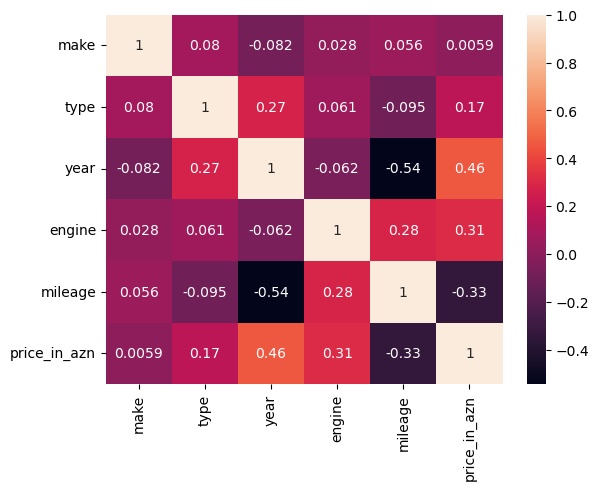

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(New_df.corr(),annot=True)
plt.show()

###### From the Heatmap,We can see some problems:
1. Multicollinearity
2. Make which is model of the cars should affect to the price but correlation is about 0.005(even p value < 0.05)